In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
import datetime as dt
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

covid = pd.read_csv('owid-covid-data.csv')

covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,...,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [2]:
covid['location'].value_counts()

San Marino        288
Sri Lanka         288
Philippines       288
Armenia           288
Nigeria           288
                 ... 
Western Sahara    171
Tajikistan        166
Comoros           165
Lesotho           152
Hong Kong          44
Name: location, Length: 212, dtype: int64

In [3]:
covid.describe(include='O')

,iso_code,continent,location,date,tests_units
count,49590,49302,49878,49878,21288
unique,211,6,212,288,5
top,IND,Europe,San Marino,2020-09-02,tests performed
freq,288,13034,288,212,11564


In [4]:
covid.isna().any()

iso_code                            True
continent                           True
location                           False
date                               False
total_cases                         True
new_cases                           True
new_cases_smoothed                  True
total_deaths                        True
new_deaths                          True
new_deaths_smoothed                 True
total_cases_per_million             True
new_cases_per_million               True
new_cases_smoothed_per_million      True
total_deaths_per_million            True
new_deaths_per_million              True
new_deaths_smoothed_per_million     True
new_tests                           True
total_tests                         True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_per_case                      True
positive_rate                       True
tests_units     

In [5]:
covid.isna().sum()

iso_code                             288
continent                            576
location                               0
date                                   0
total_cases                          636
new_cases                            860
new_cases_smoothed                  1642
total_deaths                         636
new_deaths                           860
new_deaths_smoothed                 1642
total_cases_per_million              924
new_cases_per_million                924
new_cases_smoothed_per_million      1707
total_deaths_per_million             924
new_deaths_per_million               924
new_deaths_smoothed_per_million     1707
new_tests                          31837
total_tests                        31412
total_tests_per_thousand           31412
new_tests_per_thousand             31837
new_tests_smoothed                 29447
new_tests_smoothed_per_thousand    29447
tests_per_case                     31069
positive_rate                      30607
tests_units     

In [6]:
nepal_case = covid[covid['location'] == 'Nepal']
nepal_case = nepal_case.dropna(subset=['total_cases'])
nepal_case

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34594,NPL,Asia,Nepal,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34595,NPL,Asia,Nepal,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34596,NPL,Asia,Nepal,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34597,NPL,Asia,Nepal,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34598,NPL,Asia,Nepal,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34877,NPL,Asia,Nepal,2020-10-09,98617.0,4364.0,2698.429,590.0,12.0,11.571,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34878,NPL,Asia,Nepal,2020-10-10,100676.0,2059.0,2603.714,600.0,10.0,11.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34879,NPL,Asia,Nepal,2020-10-11,105684.0,5008.0,3016.286,614.0,14.0,12.286,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34880,NPL,Asia,Nepal,2020-10-12,107755.0,2071.0,2990.286,636.0,22.0,14.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


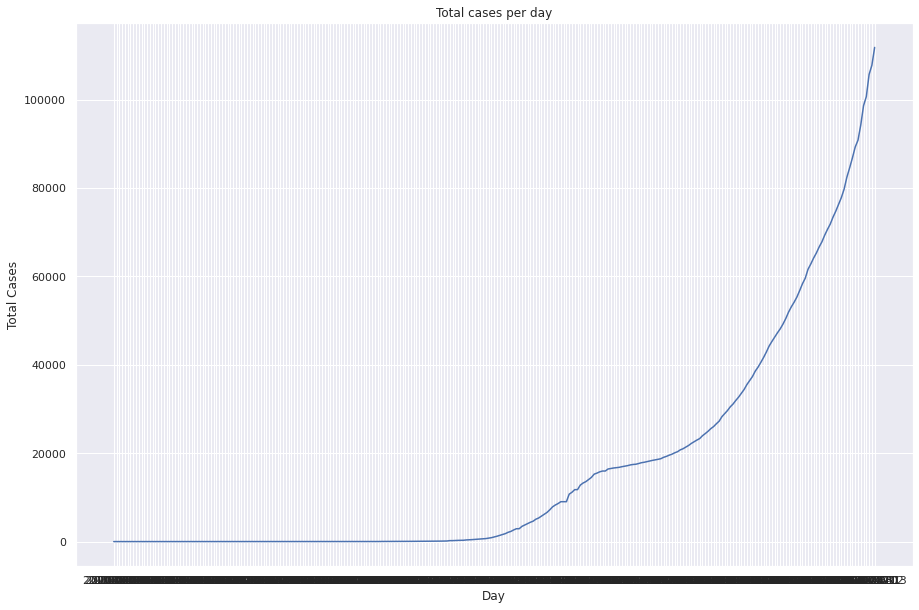

In [7]:
sns.set(rc={'figure.figsize': (15,10)})
sns.lineplot(x='date', y='total_cases', data=nepal_case)
plt.title('Total cases per day')
plt.xlabel('Day')
plt.ylabel('Total Cases')
plt.show()

In [8]:
nepal_case = nepal_case.tail(40)

<AxesSubplot:xlabel='date', ylabel='total_cases'>

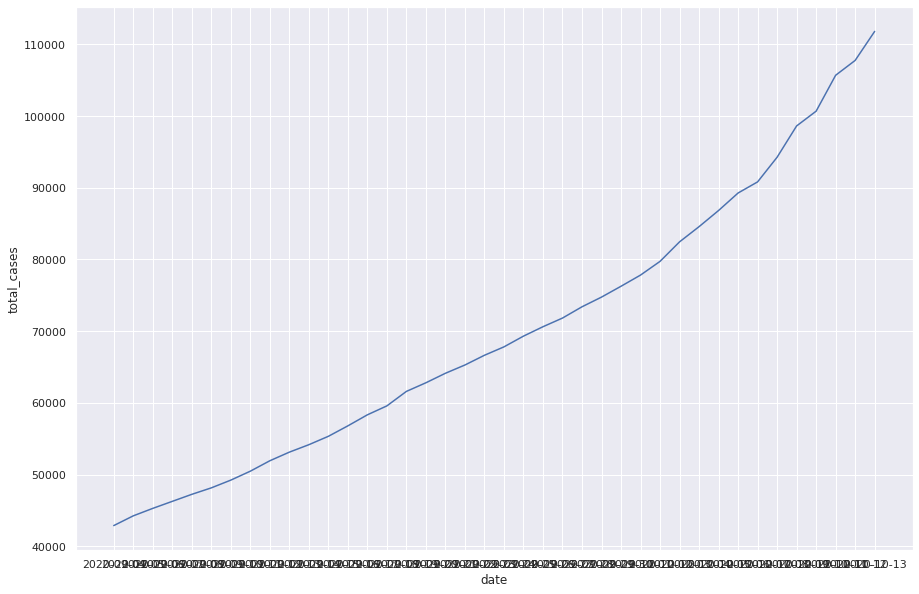

In [9]:
nepal_last_week = nepal_case
sns.lineplot(x='date', y='total_cases', data=nepal_last_week)

In [10]:
# sns.lineplot(x='date', y='new_tests', data=nepal_last_week)
# plt.show()

In [11]:
# nepal_india_america = covid[(covid['location'] == 'Nepal') | (covid['location'] == 'India') | (covid['location'] == 'United States')]

# sns.barplot(x='location', y='total_cases', data=nepal_india_america, hue='date')
# plt.show()

In [12]:
last_day_cases = covid[covid['date'] == '2020-10-13']
max_cases = last_day_cases.sort_values(by='total_cases', ascending=False)

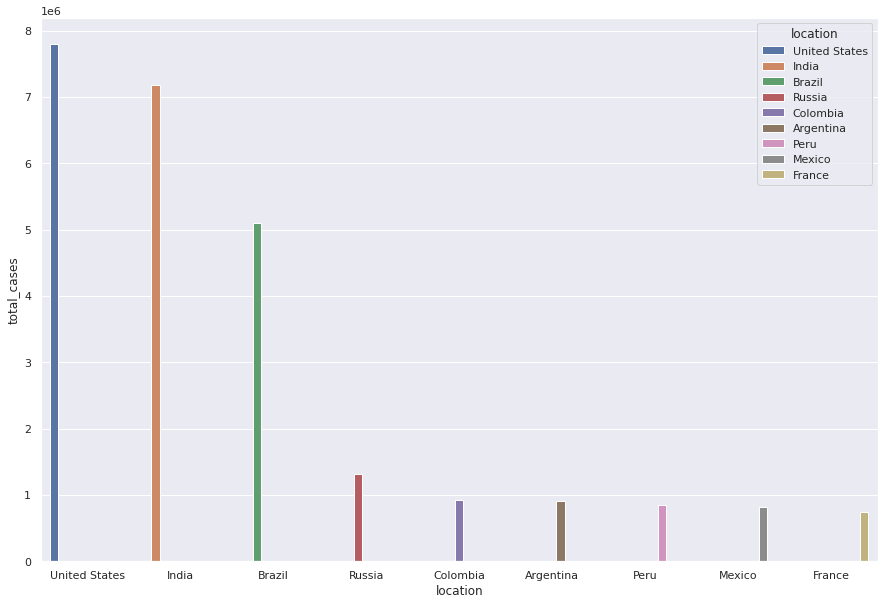

In [13]:
sns.barplot(data=max_cases[1:10], x='location', y='total_cases', hue='location')
plt.show()

In [14]:
nepal_case['date'] = pd.to_datetime(nepal_case['date'])
nepal_case.tail()

/home/razor/Desktop/test/Python/programs/jupyter_test/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34877,NPL,Asia,Nepal,2020-10-09,98617.0,4364.0,2698.429,590.0,12.0,11.571,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34878,NPL,Asia,Nepal,2020-10-10,100676.0,2059.0,2603.714,600.0,10.0,11.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34879,NPL,Asia,Nepal,2020-10-11,105684.0,5008.0,3016.286,614.0,14.0,12.286,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34880,NPL,Asia,Nepal,2020-10-12,107755.0,2071.0,2990.286,636.0,22.0,14.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34881,NPL,Asia,Nepal,2020-10-13,111802.0,4047.0,3219.857,645.0,9.0,13.000,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


In [15]:
nepal_case['date'] = nepal_case['date'].map(dt.datetime.toordinal)


/home/razor/Desktop/test/Python/programs/jupyter_test/test_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
nepal_case.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
34877,NPL,Asia,Nepal,737707,98617.0,4364.0,2698.429,590.0,12.0,11.571,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34878,NPL,Asia,Nepal,737708,100676.0,2059.0,2603.714,600.0,10.0,11.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34879,NPL,Asia,Nepal,737709,105684.0,5008.0,3016.286,614.0,14.0,12.286,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34880,NPL,Asia,Nepal,737710,107755.0,2071.0,2990.286,636.0,22.0,14.429,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574
34881,NPL,Asia,Nepal,737711,111802.0,4047.0,3219.857,645.0,9.0,13.000,...,2442.804,15.0,260.797,7.26,9.5,37.8,47.782,0.3,70.78,0.574


In [17]:
print(dt.datetime.toordinal(pd.to_datetime('2020-10-14')))

737712


In [18]:
x = nepal_case['date']
y = nepal_case['total_cases']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [19]:
# lr = LinearRegression()
# lr.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

In [20]:
degree = 9
polyreg = make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(np.array(x_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression())])

In [21]:
y_pred = polyreg.predict(np.array(x_test).reshape(-1,1))
y_pred

array([[ 65754.47821045],
       [ 61220.66357422],
       [ 59803.91906738],
       [ 77987.71972656],
       [ 47338.82928467],
       [ 55837.2543335 ],
       [101891.42419434],
       [ 79924.40563965],
       [106852.18035889],
       [ 49179.90429688],
       [ 76098.30480957],
       [ 52295.92401123]])

In [22]:
mean_squared_error(y_test, y_pred)

4683306.748884421

In [23]:
polyreg.predict(np.array([[737711]]))

array([[106852.18054199]])

<AxesSubplot:xlabel='date', ylabel='total_cases'>

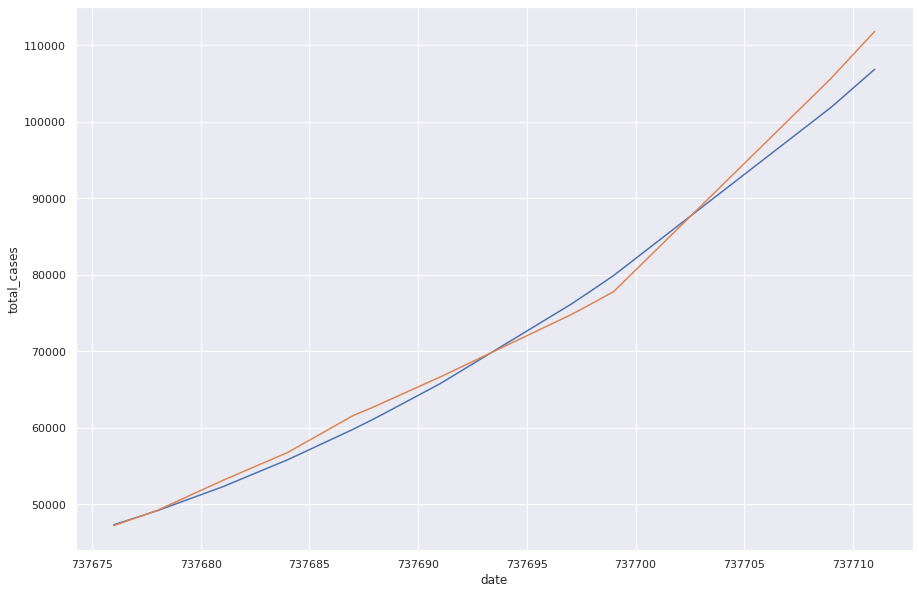

In [24]:
sns.lineplot(x=x_test,y=y_pred[:,0])
sns.lineplot(x=x_test,y=y_test)
